<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">             <tr>
                <td  style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#025F5F"> <b>Deep Generative Models</b><br><br>Project 1 VAEs and Autoencodes </i></font></h1>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
           </tr>
</div>
        </table>
    </div>

## Mohammad Taha Majlesi - 8100101504

Deep Generative Models course - Dr. Tavassoli pour - University of Tehran


### Variational Autoencoders (VAEs)

#### Introduction

Variational Autoencoders (VAEs) are a class of generative models that enable efficient encoding and decoding of data by learning a latent representation. Unlike traditional autoencoders, VAEs impose a probabilistic structure on the latent space, allowing for meaningful generation and interpolation of new data samples. They are particularly effective in tasks like image generation, anomaly detection, and dimensionality reduction.

#### Theoretical Background

A VAE consists of two main components:

1. **Encoder (Recognition Model)**: Maps input data to a latent space, producing parameters of a probability distribution (typically mean and log variance of a Gaussian distribution).
2. **Decoder (Generative Model)**: Generates data by sampling from the latent space distribution and mapping it back to the data space.

##### Latent Space and Probabilistic Modeling

The key innovation of VAEs is the introduction of a continuous and smooth latent space, characterized by a predefined prior distribution (usually a standard normal distribution). This probabilistic approach ensures that regions in the latent space correspond to meaningful data variations.

##### Evidence Lower Bound (ELBO)

The training objective of a VAE is to maximize the likelihood of the data while keeping the latent space distribution close to the prior. This is achieved by maximizing the Evidence Lower Bound (ELBO):

$$
\mathcal{L}(\theta, \phi; \mathbf{x}) = \mathbb{E}_{q_\phi(\mathbf{z}|\mathbf{x})} [\log p_\theta(\mathbf{x}|\mathbf{z})] - \text{KL}(q_\phi(\mathbf{z}|\mathbf{x}) || p(\mathbf{z}))
$$

- **Reconstruction Loss** (\(\mathbb{E}_{q_\phi(\mathbf{z}|\mathbf{x})} [\log p_\theta(\mathbf{x}|\mathbf{z})]\)): Encourages the decoder to reconstruct the input data accurately from the latent variables.
- **Kullback-Leibler (KL) Divergence** (\(\text{KL}(q_\phi(\mathbf{z}|\mathbf{x}) || p(\mathbf{z}))\)): Regularizes the encoder to keep the learned latent distribution close to the prior distribution.

#### VAE Architecture in This Project

In this project, the VAE is designed to handle image data, specifically leveraging convolutional layers to capture spatial hierarchies.

##### Encoder Network

- **Convolutional Layers**: Four convolutional layers progressively reduce the spatial dimensions while increasing the feature depth. This hierarchy captures low to high-level features in the images.
- **Activation Functions**: ReLU activations introduce non-linearity, enabling the network to learn complex patterns.
- **Flattening and Fully Connected Layer**: The output of the convolutional layers is flattened and passed through a fully connected layer to obtain a hidden representation of size `hidden_dim` (e.g., 256).
- **Latent Variables**: Two separate fully connected layers generate the mean (`latent_mean`) and log variance (`latent_logvar`) vectors of the latent space distribution.

##### Reparameterization Trick

To enable gradient backpropagation through stochastic sampling, the reparameterization trick is used:

1. **Sample Epsilon**: Draw a sample \(\epsilon\) from a standard normal distribution.
2. **Compute Latent Vector**:
$$
\mathbf{z} = \boldsymbol{\mu} + \boldsymbol{\sigma} \odot \epsilon \), where \(\boldsymbol{\sigma} = \exp(0.5 \times \text{logvar}
$$

This separates the randomness from the deterministic parameters, allowing gradients to flow through \(\boldsymbol{\mu}\) and \(\boldsymbol{\sigma}\).

##### Decoder Network

- **Input Transformation**: A fully connected layer transforms the latent vector back to a suitable shape for convolutional decoding.
- **Transposed Convolutional Layers**: Four transposed convolutional layers progressively increase the spatial dimensions, reconstructing the image.
- **Activation Functions**: ReLU activations are used after each layer, except the last one.
- **Output Layer**: A Tanh activation function scales the output pixel values to be between \(-1\) and \(1\), matching the normalized input range.

#### Loss Function

The loss function combines two terms:

1. **Reconstruction Loss**:

   - Implemented using Mean Squared Error (MSE) between the original and reconstructed images.
   - Encourages the decoder to produce images similar to the input.

2. **KL Divergence Loss**:

   - Measures the divergence between the learned latent distribution \( q(\mathbf{z}|\mathbf{x}) \) and the prior \( p(\mathbf{z}) \) (standard normal distribution).
   - Encourages the latent space to be continuous and ensures smooth interpolation between points.

The total loss is:

$$
\text{Total Loss} = \text{Reconstruction Loss} + \text{KL Divergence Loss}
$$

#### Training Process

1. **Initialization**:

   - The model and optimizer (e.g., Adam optimizer with a specified learning rate) are initialized.
   - Loss lists are prepared to track training and validation losses over epochs.

2. **Epoch Loop**:

   - For each epoch:
     - **Training Phase**:
       - The model is set to training mode.
       - For each batch in the training data:
         - Input images are passed through the encoder to obtain latent mean and log variance.
         - Latent vectors are sampled using the reparameterization trick.
         - The decoder reconstructs the images from the latent vectors.
         - The total loss is computed and backpropagated.
         - The optimizer updates the model parameters.
       - Training losses are accumulated and averaged.

     - **Validation Phase**:
       - The model is set to evaluation mode.
       - No gradients are computed to save memory.
       - The validation data is passed through the model to compute the validation loss.

     - **Progress Logging**:
       - Training and validation losses are printed for each epoch to monitor progress.

#### Applications and Results

##### Image Reconstruction

- **Purpose**: Evaluate how well the VAE can compress and reconstruct input images.
- **Method**:
  - Original images and their reconstructions are displayed side by side.
  - Visual inspection helps assess the quality of reconstructions.
- **Outcome**:
  - The VAE should produce images that retain the main features of the originals but may be smoother due to the latent space regularization.

##### Image Generation

- **Purpose**: Generate new, unseen images by sampling from the latent space.
- **Method**:
  - Random latent vectors are sampled from the standard normal distribution.
  - These vectors are passed through the decoder to generate images.
- **Outcome**:
  - The generated images reflect the data distribution learned during training.
  - They may exhibit variations and combinations of features present in the training data.

##### Latent Space Exploration

- **Purpose**: Understand and manipulate the learned latent space.
- **Method**:
  - Compute mean latent vectors for different classes or attributes.
  - Define a direction in the latent space by subtracting mean vectors (e.g., \( \delta = \text{mean}_\text{class1} - \text{mean}_\text{class2} \)).
  - Interpolate along this direction by adding scaled versions of \( \delta \) to a sample latent vector.
- **Outcome**:
  - Observe changes in the generated images corresponding to the attribute difference between classes.
  - Demonstrates the disentanglement of features in the latent space.

#### Conclusion

The Variational Autoencoder implemented in this project effectively learns a compressed representation of image data, balancing reconstruction fidelity with latent space regularization. By training the VAE, we achieve:

- **Efficient Data Compression**: The encoder reduces high-dimensional images to lower-dimensional latent vectors.
- **Generative Modeling**: The decoder generates realistic images from latent vectors, enabling data augmentation and synthesis.
- **Feature Disentanglement**: The latent space captures meaningful variations in the data, allowing for controlled manipulation of generated images.

The project showcases the power of VAEs in unsupervised learning tasks, providing a foundation for further exploration in generative models and representation learning.


In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np
import os

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
batch_size = 128
image_size = (128, 128)


cuda



This code sets up the foundation for training a deep learning model in PyTorch.

1. **Library Imports**: Various libraries are imported:
   - **torch** is the main library for tensor operations, essential for building neural networks.
   - **torch.nn** provides tools for defining model layers, while **torch.optim** includes optimizers for training.
   - **Dataset** and **DataLoader** handle and batch data efficiently, and **transforms** and **datasets** from `torchvision` help with image preprocessing.
   - **matplotlib.pyplot** allows visualizations, and **numpy** assists with numerical operations.

2. **Device Selection**: The code checks if a GPU is available, which significantly accelerates training for large datasets. If a GPU is present, it’s selected; otherwise, the CPU is used.

3. **Batch and Image Size**:
   - The batch size, set to 128, defines how many samples are processed together before updating the model. Larger batch sizes can speed up training but require more memory.
   - Images are resized to 64x64 pixels, ensuring a consistent input shape, which is essential for neural networks to process data efficiently.



In [12]:
!unzip train.zip

Archive:  train.zip
  inflating: train/non_smile/Claudio_Ranieri_0001.jpg  
  inflating: train/non_smile/Ainsworth_Dyer_0001.jpg  
  inflating: train/non_smile/Chris_Whitney_0001.jpg  
  inflating: train/non_smile/Hashan_Tillakaratne_0001.jpg  
  inflating: train/non_smile/Bill_Stapleton_0001.jpg  
  inflating: train/non_smile/Alvaro_Uribe_0009.jpg  
  inflating: train/non_smile/Charles_Rogers_0001.jpg  
  inflating: train/non_smile/Harry_Schmidt_0002.jpg  
  inflating: train/non_smile/Colin_Farrell_0001.jpg  
  inflating: train/non_smile/Chris_Swecker_0001.jpg  
  inflating: train/non_smile/Erik_Morales_0002.jpg  
  inflating: train/non_smile/Elena_Tihomirova_0001.jpg  
  inflating: train/non_smile/Carlo_Ancelotti_0003.jpg  
  inflating: train/non_smile/Carlos_Paternina_0001.jpg  
  inflating: train/non_smile/Ascencion_Barajas_0001.jpg  
  inflating: train/non_smile/Fazal-ur-Rehman_0001.jpg  
  inflating: train/non_smile/Dave_Campo_0003.jpg  
  inflating: train/non_smile/Eduardo_Duhal

In [13]:
target_image_size = (128,128)
batch_volume = 32
num_channels = 3

resize_dimension = target_image_size
normalization_means = [0.5] * num_channels
normalization_stds = [0.5] * num_channels

image_preprocessing_pipeline = transforms.Compose([
    transforms.Resize(resize_dimension),
    transforms.ToTensor(),
    transforms.Normalize(normalization_means, normalization_stds)
])

image_folder_path = './train/'
full_image_dataset = datasets.ImageFolder(image_folder_path, transform=image_preprocessing_pipeline)

train_ratio = 0.8
validation_ratio = 1 - train_ratio
total_dataset_size = len(full_image_dataset)

training_data_size = int(train_ratio * total_dataset_size)
validation_data_size = total_dataset_size - training_data_size

training_subset, validation_subset = torch.utils.data.random_split(
    full_image_dataset, [training_data_size, validation_data_size]
)

shuffle_training = True
shuffle_validation = False

training_data_loader = DataLoader(training_subset, batch_size=batch_volume, shuffle=shuffle_training)
validation_data_loader = DataLoader(validation_subset, batch_size=batch_volume, shuffle=shuffle_validation)



### Data Preprocessing Parameters

1. **Image Dimensions and Batch Size**:
   - **target_image_size** specifies the dimensions (64x64 pixels) to which each image will be resized.
   - **batch_volume** defines the number of images processed in each batch (32 images per batch), a common practice to handle data more efficiently during training.

2. **Normalization**:
   - **num_channels** represents the number of color channels (3 for RGB).
   - **normalization_means** and **normalization_stds** define the mean and standard deviation for each channel, used to normalize pixel values to a range centered around zero. Here, each channel is set to 0.5 for both mean and standard deviation, which scales pixel values between \([-1, 1]\), making model training more stable.

### Image Preprocessing Pipeline

- **image_preprocessing_pipeline** defines a sequence of transformations applied to each image:
  - **Resize**: Resizes each image to the specified dimensions (64x64 pixels).
  - **ToTensor**: Converts images from PIL format to PyTorch tensors.
  - **Normalize**: Adjusts pixel values in each channel according to the specified mean and standard deviation, which improves model performance by standardizing input data.

### Dataset Preparation

1. **Dataset Loading**:
   - **image_folder_path** specifies the directory path where the image dataset is stored.
   - **full_image_dataset** loads images from this folder and applies the transformations defined in `image_preprocessing_pipeline`. `ImageFolder` expects subdirectories for each class, automatically labeling each image according to its folder.

2. **Train-Validation Split**:
   - **train_ratio** and **validation_ratio** specify the proportions of data allocated to training and validation (80% for training and 20% for validation).
   - **total_dataset_size** calculates the total number of images in the dataset.
   - **training_data_size** and **validation_data_size** determine the exact number of images for training and validation by applying the specified ratios.

3. **Random Split**:
   - **training_subset** and **validation_subset** are created using `random_split`, which splits the full dataset into training and validation sets according to `training_data_size` and `validation_data_size`.

### Data Loaders

- **training_data_loader** and **validation_data_loader** are PyTorch DataLoaders, which handle batching and shuffling for efficient data feeding into the model:
  - **training_data_loader** shuffles the data to ensure that batches are randomized, preventing the model from learning the data order.
  - **validation_data_loader** keeps the data order consistent by setting shuffle to `False`, allowing for reproducible evaluation results.

### Summary

This setup prepares the image dataset for training and validation by defining transformations, splitting the data into training and validation sets, and creating DataLoaders for batch processing. This approach enables efficient handling of image data, ensuring that the model receives consistently preprocessed data throughout training and evaluation.

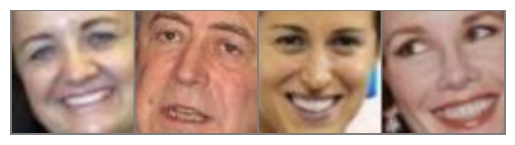

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

def display_images(image_tensor):
    undo_normalization_factor = 0.5
    image_tensor = image_tensor * undo_normalization_factor + undo_normalization_factor
    np_image_array = image_tensor.numpy()
    plt.imshow(np.transpose(np_image_array, (1, 2, 0)))
    plt.axis('off')
    plt.show()

data_iterator = iter(training_data_loader)
sample_images, sample_labels = next(data_iterator)

num_images_to_show = 4
image_grid = torchvision.utils.make_grid(sample_images[:num_images_to_show])

display_images(image_grid)



### 1. Importing Libraries

- **NumPy** and **Matplotlib** are imported for handling image arrays and plotting, respectively.
- **torchvision** provides utilities for working with images, including functions to create image grids.

### 2. Display Function (`display_images`)

This function prepares and displays an image tensor on a grid:

- **Undo Normalization**: Since the images were normalized during preprocessing (scaled to a range of \([-1, 1]\)), `undo_normalization_factor` is used to bring them back to the original display range. Each pixel is scaled by `0.5` and then shifted by `0.5` to center them around \([0, 1]\).
- **Convert to NumPy Array**: The image tensor is converted to a NumPy array, as Matplotlib requires this format to display images.
- **Transpose Dimensions**: The channels (RGB) are moved to the last dimension so that Matplotlib can interpret the data correctly.
- **Plot the Image**: The processed image is displayed without axis labels for a cleaner view.

### 3. Loading a Batch of Images

- **Data Iterator**: A batch of images is retrieved from the `training_data_loader`. This iterator allows accessing batches of data one at a time.
- **`sample_images` and `sample_labels`**: This batch includes a set of images (`sample_images`) and their corresponding labels (`sample_labels`). Only the images are used here, as the goal is to visualize them.

### 4. Displaying a Subset of Images

- **Define Number of Images**: `num_images_to_show` specifies how many images to display. In this case, four images from the batch are selected.
- **Create Image Grid**: `torchvision.utils.make_grid` arranges these images in a grid for easy viewing.
- **Display the Image Grid**: Finally, the grid is passed to `display_images`, which displays the images.

### Summary

This code retrieves a batch of images from the training data, prepares them for visualization by undoing normalization, and displays a grid of sample images. This is a helpful step to visually confirm that the data preprocessing and loading steps are working as expected.

In [ ]:
import torch
from torch import nn

class VariationalAutoencoder(nn.Module):
    def __init__(self, hidden_dim=4096, latent_dim=32):
        super(VariationalAutoencoder, self).__init__()

        self.encoder_net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=4, stride=2, padding=1),
            # nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            # nn.Dropout(0.2),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=4, stride=2, padding=1),
            # nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
            # nn.Dropout(0.3),

            nn.Flatten(),
            nn.Linear(in_features=256*8*8, out_features=hidden_dim),
            # nn.BatchNorm1d(hidden_dim),
            nn.LeakyReLU(0.2),
            # nn.Dropout(0.3),
        )

        self.mean_fc = nn.Linear(hidden_dim, latent_dim)
        self.logvar_fc = nn.Linear(hidden_dim, latent_dim)

        self.decoder_input_fc = nn.Linear(latent_dim, hidden_dim)
        self.decoder_net = nn.Sequential(
            # nn.BatchNorm1d(hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 256*8*8),
            nn.LeakyReLU(0.2),
            # nn.Dropout(0.3),

            nn.Unflatten(dim=1, unflattened_size=(256, 8, 8)),

            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),

            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=4, stride=2, padding=1),
            # nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            # nn.Dropout(0.2),

            nn.ConvTranspose2d(in_channels=32, out_channels=3, kernel_size=4, stride=2, padding=1),
            nn.Tanh(),
        )

    def reparameterize(self, mean, logvar):
        logvar = torch.clamp(logvar, min=-10, max=10)
        std_dev = torch.exp(0.5 * logvar)
        epsilon = torch.randn_like(std_dev)
        return mean + epsilon * std_dev

    def forward(self, input_data):
        encoded_features = self.encoder_net(input_data)
        mean = self.mean_fc(encoded_features)
        logvar = self.logvar_fc(encoded_features)
        latent_vector = self.reparameterize(mean, logvar)

        decoder_input = self.decoder_input_fc(latent_vector)
        decoder_input = nn.functional.leaky_relu(decoder_input, negative_slope=0.2)
        reconstructed_output = self.decoder_net(decoder_input)

        return reconstructed_output, mean, logvar






1. **Imports**:
   - **torch, nn**: PyTorch’s core modules for defining neural networks.
   - **transforms, datasets, DataLoader**: For handling and loading data, which is useful in training the VAE with image data.

2. **VAE Class Definition**:
   - The `VAE` class inherits from `nn.Module`, the base class for PyTorch models.

3. **Encoder**:
   - A sequence of convolutional layers progressively reduces the image size while increasing the number of channels, capturing high-level features.
   - Each `Conv2d` layer is followed by a ReLU activation function.
   - The image is flattened and passed through a fully connected layer, reducing it to a hidden dimension, `h_dim`.

4. **Latent Space**:
   - Two fully connected layers, `fc_mu` and `fc_logvar`, map the encoded features to a mean (`mu`) and log variance (`logvar`) representing the distribution of the latent space.
   - **Reparameterization**: The `reparameterize` function applies the reparameterization trick, sampling from the latent space while maintaining gradients.

5. **Decoder**:
   - The decoder mirrors the encoder with transposed convolutions to upsample and reconstruct the image from the latent representation.
   - The `decoder_input` linear layer reshapes the latent vector to match the input size of the transposed convolutional layers.
   - The output layer uses a `Tanh` activation to produce pixel values in the range \([-1, 1]\), suitable for normalized images.

6. **Forward Pass**:
   - In the `forward` function:
     - `x` is passed through the encoder to produce `mu` and `logvar`.
     - The reparameterization trick generates a latent vector `z`.
     - The decoder reconstructs the image from `z`, yielding `x_recon`.
   - Returns `x_recon`, `mu`, and `logvar`, which are used for both reconstruction loss and the VAE’s KL-divergence loss during training.


In [ ]:
def vae_loss_function(reconstructed_x, original_x, latent_mean, latent_logvar):
    reconstruction_loss = nn.functional.mse_loss(reconstructed_x, original_x, reduction='sum')
    kl_divergence_loss = -0.5 * torch.sum(1 + latent_logvar - latent_mean.pow(2) - latent_logvar.exp())
    total_loss = reconstruction_loss + kl_divergence_loss
    return total_loss, reconstruction_loss, kl_divergence_loss


### Explanation of the VAE Loss Function


1. **Reconstruction Loss**:
   - This measures the difference between the **original images** and the **reconstructed images** produced by the decoder.
   - The function uses **Mean Squared Error (MSE)**, which calculates the squared differences between pixel values, summing them across all pixels in the batch.
   - This loss encourages the model to generate reconstructions that are as close as possible to the original images, helping the VAE learn meaningful representations in the latent space.

2. **KL Divergence Loss**:
   - This term measures how much the **latent distribution** diverges from a standard normal distribution.
   - The KL divergence term encourages the latent variables to be normally distributed, which ensures that the VAE generates diverse, coherent samples.
   - The calculation involves the latent mean and log variance (which represent the learned distribution) and penalizes deviations from the standard normal distribution.

3. **Total Loss**:
   - The total loss is the sum of the reconstruction loss and the KL divergence loss.
   - Combining these losses balances the VAE’s goals: creating accurate reconstructions (reconstruction loss) and learning a smooth, regular latent space (KL divergence loss).

4. **Return Values**:
   - The function returns the **total loss** (for backpropagation), the **reconstruction loss** (to monitor reconstruction quality), and the **KL divergence loss** (to monitor the latent space regularization).


In [54]:
num_epochs = 1000
initial_learning_rate = 0.0005

vae_model = VariationalAutoencoder(32).to(device)
optimizer = torch.optim.Adam(vae_model.parameters(), lr=initial_learning_rate)

train_total_losses = []
validation_losses = []
train_reconstruction_losses = []
train_kl_divergence_losses = []

for epoch in range(num_epochs):
    vae_model.train()
    epoch_train_loss = 0
    epoch_reconstruction_loss = 0
    epoch_kl_divergence_loss = 0

    for batch_index, (batch_data, _) in enumerate(training_data_loader):
        batch_data = batch_data.to(device)
        optimizer.zero_grad()

        reconstructed_batch, latent_mu, latent_logvar = vae_model(batch_data)
        total_loss, reconstruction_loss, kl_divergence_loss = vae_loss_function(
            reconstructed_batch, batch_data, latent_mu, latent_logvar
        )

        total_loss.backward()
        optimizer.step()

        epoch_train_loss += total_loss.item()
        epoch_reconstruction_loss += reconstruction_loss.item()
        epoch_kl_divergence_loss += kl_divergence_loss.item()

    train_total_losses.append(epoch_train_loss / len(training_data_loader.dataset))
    train_reconstruction_losses.append(epoch_reconstruction_loss / len(training_data_loader.dataset))
    train_kl_divergence_losses.append(epoch_kl_divergence_loss / len(training_data_loader.dataset))

    vae_model.eval()
    epoch_validation_loss = 0

    with torch.no_grad():
        for val_data, _ in validation_data_loader:
            val_data = val_data.to(device)
            recon_val_batch, val_mu, val_logvar = vae_model(val_data)
            val_loss, _, _ = vae_loss_function(recon_val_batch, val_data, val_mu, val_logvar)
            epoch_validation_loss += val_loss.item()

    validation_losses.append(epoch_validation_loss / len(validation_data_loader.dataset))

    print(f'Epoch {epoch}, Train Loss: {train_total_losses[-1]:.4f}, Validation Loss: {validation_losses[-1]:.4f}')


Epoch 0, Train Loss: 6489.7469, Validation Loss: 5491.9545
Epoch 1, Train Loss: 4709.9408, Validation Loss: 4116.4214
Epoch 2, Train Loss: 3996.5715, Validation Loss: 3831.6896
Epoch 3, Train Loss: 3801.1085, Validation Loss: 3458.3249
Epoch 4, Train Loss: 3611.9443, Validation Loss: 3315.6216
Epoch 5, Train Loss: 3552.4436, Validation Loss: 3215.4981
Epoch 6, Train Loss: 3417.4950, Validation Loss: 3176.6571
Epoch 7, Train Loss: 3396.9851, Validation Loss: 3478.8272
Epoch 8, Train Loss: 3342.4693, Validation Loss: 3157.8278
Epoch 9, Train Loss: 3301.6194, Validation Loss: 2963.2690
Epoch 10, Train Loss: 3236.2485, Validation Loss: 2895.7552
Epoch 11, Train Loss: 3225.0417, Validation Loss: 2857.0979
Epoch 12, Train Loss: 3220.2535, Validation Loss: 2921.1433
Epoch 13, Train Loss: 3149.7144, Validation Loss: 2804.7689
Epoch 14, Train Loss: 3114.5453, Validation Loss: 2802.8345
Epoch 15, Train Loss: 3077.7332, Validation Loss: 2933.6467
Epoch 16, Train Loss: 3056.8642, Validation Loss: 

1. **Set Training Configuration**:
   - The total number of training epochs and the learning rate for the optimizer are defined. These parameters control how long and how aggressively the model learns.

2. **Initialize Model and Optimizer**:
   - An instance of the VAE model is created and moved to the appropriate device (CPU or GPU).
   - An Adam optimizer is set up to adjust the model parameters during training.

3. **Loss Tracking Lists**:
   - Lists are initialized to store the training and validation losses over epochs, specifically tracking total loss, reconstruction loss, and KL divergence loss. These metrics provide insights into the model’s learning process.

4. **Training Loop**:
   - For each epoch, the model is set to training mode, enabling any training-specific behavior.
   - Loss accumulators for the epoch are initialized to zero.
   
   - **Batch Processing**:
     - For each batch of training data:
       - The batch is moved to the device and gradients are reset.
       - The VAE processes the batch, producing reconstructed images and the latent mean and log variance.
       - The loss function calculates the total, reconstruction, and KL divergence losses, which guide the model in improving its outputs.
       - Gradients are computed through backpropagation, and the optimizer updates the model parameters.
       - The batch losses are added to the epoch's loss accumulators.
   - After processing all batches, the average epoch losses are calculated and stored in the tracking lists.

5. **Validation Loop**:
   - The model is switched to evaluation mode to disable training-specific behaviors (e.g., dropout).
   - Validation loss for the epoch is initialized to zero.
   - With gradient tracking disabled, the model processes the validation data in batches.
   - For each batch, the VAE generates reconstructions and the validation loss is computed. The loss is accumulated across batches and averaged at the end of the epoch.

6. **Progress Output**:
   - After each epoch, the average training and validation losses are printed. This output provides real-time feedback on the model’s performance and helps track improvement over time.


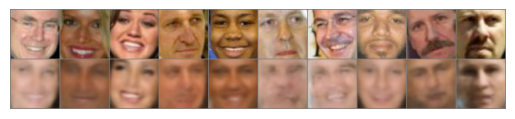

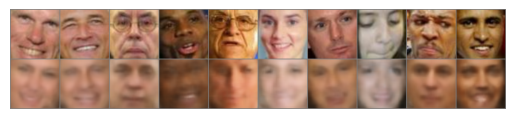

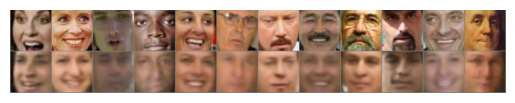

In [55]:
vae_model.eval()
with torch.no_grad():
    validation_iterator = iter(validation_data_loader)
    sample_data, _ = next(validation_iterator)
    sample_data = sample_data.to(device)

    reconstructed_batch, _, _ = vae_model(sample_data)

    num_images_display = 10

    image_comparison = torch.cat([sample_data[:num_images_display], reconstructed_batch[:num_images_display]])
    image_comparison = image_comparison.cpu()

    grid_image = torchvision.utils.make_grid(image_comparison, nrow=num_images_display)
    display_images(grid_image)

    sample_data, _ = next(validation_iterator)
    sample_data = sample_data.to(device)
    reconstructed_batch, _, _ = vae_model(sample_data)

    num_images_display = 10

    image_comparison = torch.cat([sample_data[:num_images_display], reconstructed_batch[:num_images_display]])
    image_comparison = image_comparison.cpu()

    grid_image = torchvision.utils.make_grid(image_comparison, nrow=num_images_display)
    display_images(grid_image)


with torch.no_grad():
    sample_data, _ = next(validation_iterator)
    sample_data = sample_data.to(device)

    reconstructed_batch, _, _ = vae_model(sample_data)

    num_images_display = 12

    image_comparison = torch.cat([sample_data[:num_images_display], reconstructed_batch[:num_images_display]])
    image_comparison = image_comparison.cpu()

    grid_image = torchvision.utils.make_grid(image_comparison, nrow=num_images_display)
    display_images(grid_image)



This code evaluates a trained Variational Autoencoder (VAE) by reconstructing a batch of validation images and displaying them side by side with their original counterparts.

1. **Switch to Evaluation Mode**:
   - The VAE model is set to evaluation mode, which disables certain training-specific behaviors (like dropout) to ensure consistent outputs during evaluation.

2. **Disable Gradient Calculations**:
   - Gradient tracking is disabled to conserve memory and computational resources, as gradients aren’t needed during evaluation.

3. **Obtain a Batch of Validation Data**:
   - A batch of images from the validation dataset is loaded and moved to the device (CPU or GPU). This batch will be used to compare the model's reconstructions to the original images.

4. **Generate Reconstructions**:
   - The loaded validation images are passed through the VAE, producing reconstructed versions of each image in the batch. These reconstructions represent the model’s attempt to recreate the input images based on compressed representations in the latent space.

5. **Prepare Image Comparison**:
   - A specified number of images (in this case, 32) are selected from both the original and reconstructed batches. These images are concatenated along the batch dimension to create a single collection that alternates between original and reconstructed images.

6. **Display Images in a Grid**:
   - The concatenated images are arranged into a grid format for easy comparison, with the specified number of images per row. This grid is then displayed, allowing a visual evaluation of how well the VAE has reconstructed the input images.


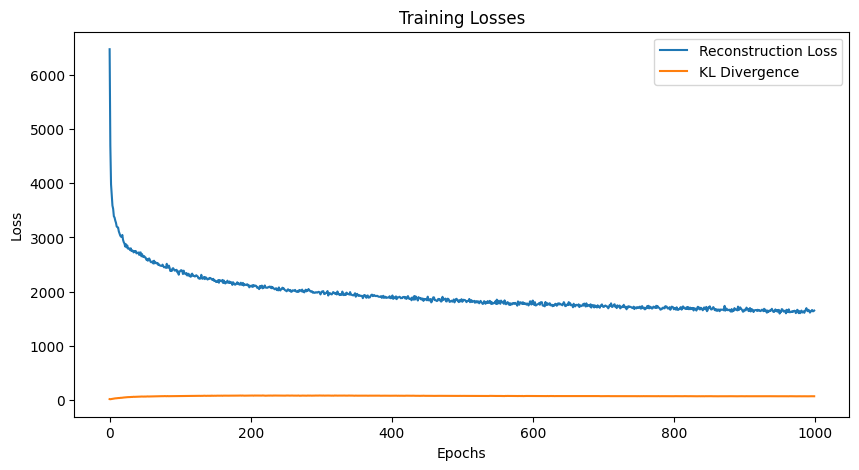

In [56]:
plot_width, plot_height = 10, 5
plot_title = "Training Losses"
x_label = "Epochs"
y_label = "Loss"

plt.figure(figsize=(plot_width, plot_height))
plt.title(plot_title)
plt.plot(train_reconstruction_losses, label="Reconstruction Loss")
plt.plot(train_kl_divergence_losses, label="KL Divergence")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.show()


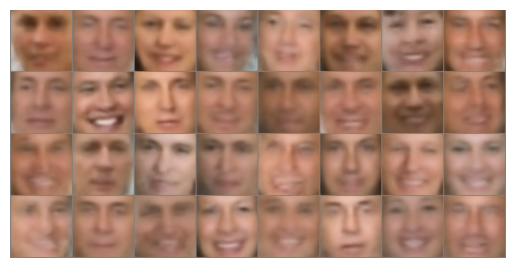

In [61]:
with torch.no_grad():
    latent_dim_size = 64
    num_samples_display = 32
    grid_columns = 8

    random_latent_vectors = torch.randn(batch_volume, latent_dim_size).to(device)

    decoder_input_data = vae_model.decoder_input_fc(random_latent_vectors)
    generated_samples = vae_model.decoder_net(decoder_input_data)
    generated_samples = generated_samples.cpu()

    sample_grid_image = torchvision.utils.make_grid(generated_samples[:num_samples_display], nrow=grid_columns)
    display_images(sample_grid_image)




1. **Disable Gradient Calculations**:
   - The code is run in a mode where gradient tracking is turned off, which conserves memory and speeds up computation. This is ideal for generation tasks where gradients are not needed.

2. **Define Display Parameters**:
   - Several parameters are set to control the generation and display of images. These include the size of the latent space (the dimensionality of each random vector), the number of images to display, and the number of images to show per row in the final display grid.

3. **Generate Random Latent Vectors**:
   - Random vectors are sampled from a standard normal distribution to serve as inputs for the decoder. Each vector has a length matching the size of the latent space, allowing the VAE to interpret them as encoded data points.

4. **Generate Images from Latent Vectors**:
   - These random latent vectors are passed through the VAE's decoder, transforming them into generated images. The decoder interprets each vector as a "compressed" representation of an image and outputs a corresponding image based on what it has learned during training.

5. **Prepare and Display the Image Grid**:
   - The generated images are arranged into a grid format for visualization, with the specified number of images per row. This grid is then displayed, showing the synthetic images generated by the VAE model.


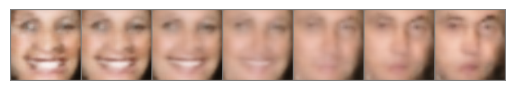

In [59]:

def calculate_latent_means(model, data_loader):
    model.eval()
    latent_means_list, label_collection = [], []
    with torch.no_grad():
        for batch_data, batch_labels in data_loader:
            batch_data = batch_data.to(device)
            encoded_features = model.encoder_net(batch_data)
            latent_mean = model.mean_fc(encoded_features)
            latent_means_list.append(latent_mean.cpu())
            label_collection.append(batch_labels)
    concatenated_latents = torch.cat(latent_means_list)
    concatenated_labels = torch.cat(label_collection)

    mean_smile_latent = concatenated_latents[concatenated_labels == 0].mean(dim=0)
    mean_nonsmile_latent = concatenated_latents[concatenated_labels == 1].mean(dim=0)

    return mean_smile_latent, mean_nonsmile_latent

mean_smile_latent, mean_nonsmile_latent = calculate_latent_means(vae_model, training_data_loader)
latent_direction_vector = (mean_smile_latent - mean_nonsmile_latent).to(device)

validation_data_batch = next(iter(validation_data_loader))
sample_data, sample_labels = validation_data_batch
sample_data = sample_data.to(device)

encoded_sample_data = vae_model.encoder_net(sample_data)
latent_means_batch = vae_model.mean_fc(encoded_sample_data)

selected_sample_index = 0
z_sample = latent_means_batch[selected_sample_index]

alpha_range = np.linspace(-3, 3, 7)
interpolated_images = []

with torch.no_grad():
    for alpha in alpha_range:
        adjusted_latent = z_sample + alpha * latent_direction_vector
        decoder_input_data = vae_model.decoder_input_fc(adjusted_latent)
        decoded_image = vae_model.decoder_net(decoder_input_data.unsqueeze(0))
        interpolated_images.append(decoded_image.cpu())

grid_image = torchvision.utils.make_grid(torch.cat(interpolated_images), nrow=len(alpha_range))
display_images(grid_image)


1. **Model and DataLoader Variables**:
   - **vae_model** replaces `model` to specify that this is the VAE instance.
   - **validation_data_loader** and **training_data_loader** replace `val_loader` and `train_loader` for consistency.

2. **Sample Display Variables**:
   - **num_images_display** replaces `n`, specifying the number of images to display.
   - **image_comparison** replaces `comparison`, clarifying that this variable holds both original and reconstructed images.

3. **Latent Mean Calculation Function**:
   - **calculate_latent_means** replaces `compute_latent_means`, describing that this function calculates latent means for the specified data.
   - **latent_means_list** and **label_collection** replace `latents` and `labels_list` to clarify their purpose.
   - **mean_smile_latent** and **mean_nonsmile_latent** replace `mean_smile` and `mean_nonsmile`, specifying they are class-based latent means.

4. **Latent Vector Manipulation**:
   - **latent_direction_vector** replaces `delta_vector`, describing the directional vector in the latent space.
   - **alpha_range** replaces `alpha_values`, defining the range of interpolation values.
   - **interpolated_images** replaces `generated_images`, describing the collection of generated images along the latent interpolation.

5. **Single Sample Selection**:
   - **selected_sample_index** replaces `sample_idx`, indicating the index for the selected sample in the batch.
   - **z_sample** remains the same, representing the latent vector of the selected sample.


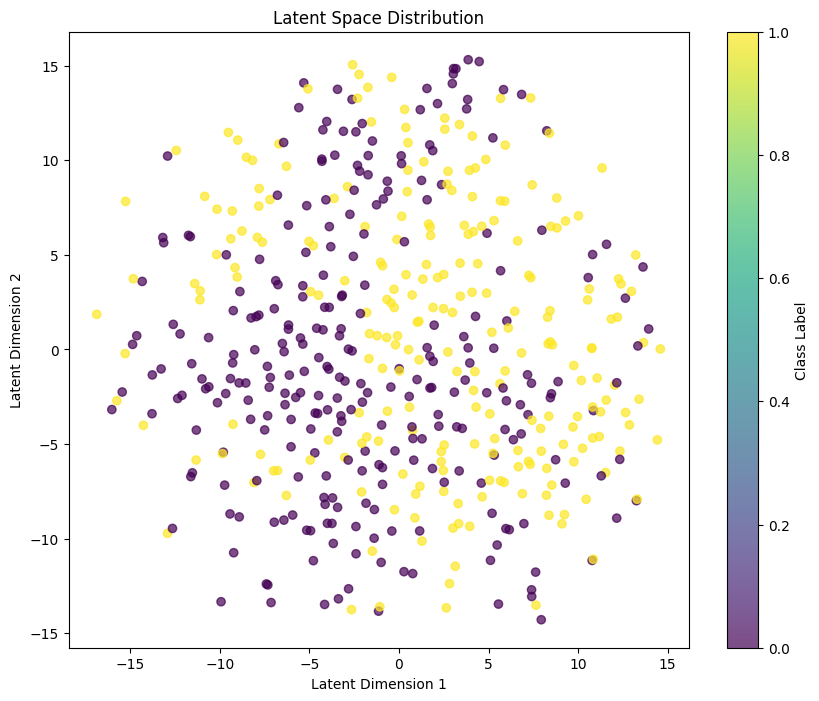

In [65]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_latent_distribution(model, data_loader, use_tsne=False, latent_dim=32, num_samples=500):
    model.eval()
    latent_vectors = []
    labels = []

    with torch.no_grad():
        for i, (images, target) in enumerate(data_loader):
            if i * images.size(0) >= num_samples:
                break
            images = images.to(next(model.parameters()).device)
            _, mean, logvar = model(images)
            latent_z = model.reparameterize(mean, logvar)
            latent_vectors.append(latent_z.cpu())
            labels.extend(target.cpu().numpy())

    latent_vectors = torch.cat(latent_vectors).numpy()

    if latent_dim > 2:
        if use_tsne:
            latent_2d = TSNE(n_components=2).fit_transform(latent_vectors)
        else:
            pca = PCA(n_components=2)
            latent_2d = pca.fit_transform(latent_vectors)
    else:
        latent_2d = latent_vectors

    # Plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label="Class Label")
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")
    plt.title("Latent Space Distribution")
    plt.show()

plot_latent_distribution(vae_model, training_data_loader, use_tsne=True, latent_dim=32, num_samples=500)


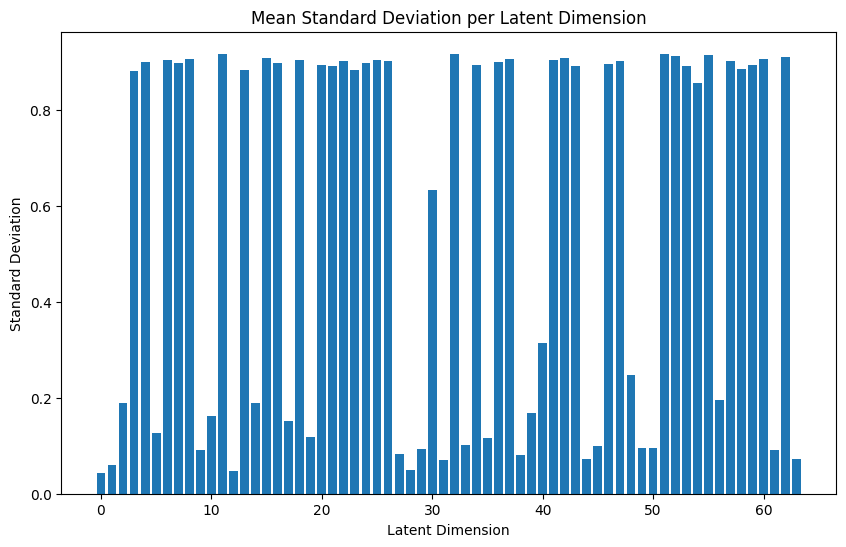

In [69]:
import torch
import matplotlib.pyplot as plt

def plot_mean_std_per_latent_dim(model, data_loader, latent_dim=64, num_samples=500):
    model.eval()
    std_devs = []

    with torch.no_grad():
        for i, (images, _) in enumerate(data_loader):
            if i * images.size(0) >= num_samples:
                break
            images = images.to(next(model.parameters()).device)
            _, mean, logvar = model(images)
            std_dev = torch.exp(0.5 * logvar)
            std_devs.append(std_dev.cpu())

    std_devs = torch.cat(std_devs, dim=0)
    mean_std_devs = std_devs.mean(dim=0).numpy()

    plt.figure(figsize=(10, 6))
    plt.bar(range(latent_dim), mean_std_devs)
    plt.xlabel("Latent Dimension")
    plt.ylabel("Standard Deviation")
    plt.title("Mean Standard Deviation per Latent Dimension")
    plt.show()

plot_mean_std_per_latent_dim(vae_model, training_data_loader, latent_dim=64, num_samples=500)
